In [1]:
from src.graphs import SPGraph
from src.mining import compute_communities

In [2]:
N = 640
rho = 1
k = 16
comm_sizes = [160, 40, 10]

graph = SPGraph(N, rho, k, comm_sizes)

In [3]:
net = graph.get_pyvis_net(level=2, notebook=True)
net.show(name='network.html')

In [4]:
scales, communities = compute_communities(
    graph=graph,
    scales_num=50,
    r_num=100)

In [5]:
net = graph.get_pyvis_net(level=40, notebook=True, predicted_communities=communities)
net.show('network_predicted.html')

In [6]:
def rand_index(p1, p2):
    pairs1 = np.array([
        [
            p1[i] == p1[j]
            for j in range(len(p1))
        ]
        for i in range(len(p1))
    ])
    pairs2 = np.array([
        [
            p2[i] == p2[j]
            for j in range(len(p2))
        ]
        for i in range(len(p2))
    ])
    a = np.logical_and(pairs1, pairs2).sum()
    b = np.logical_and(1 - pairs1, 1 - pairs2).sum()
    c = np.logical_and(pairs1, 1 - pairs2).sum()
    d = np.logical_and(1 - pairs1, pairs2).sum()
    return (a + b) / (a + b + c + d)

100%|██████████| 50/50 [00:11<00:00,  4.38it/s]


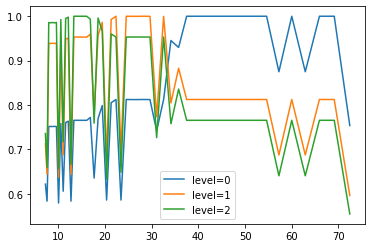

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

plt.figure()
for level in [0, 1, 2]:
    rand_idx = [
        rand_index(graph.communities[:, level], communities[:, i])
        for i, scale in tqdm(enumerate(scales), total=len(scales))
    ]
    plt.plot(scales, rand_idx, label=f'level={level}')
plt.legend()
plt.show()